# TF-IDF

\begin{equation}
w_{i,j} = \text{tf}_{i,j} \log\left(\frac{N}{\text{df}_i}\right)
\end{equation}

$i$ palabra o n-grama <br>
$j$ documento <br>
$\text{tf}_{i,j}$ cantidad de ocurrencias de $i$ en $j$ <br>
$\text{df}_i$ cantidad de documentos con contienen $i$ <br>
$N$ cantidad total de documentos

### TF (Term Frequency)

Cantidad de veces que aparece una palabra en un documento dividido el total de palabras del documento.

<img src="images/tf.png" alt="drawing" width="200"/>

In [140]:
documento_1 = "el perro quiere correr en el campo."

documento_2 = "hay un bombero en el techo."

In [142]:
bow_1 = documento_1.split(' ')

bow_2 = documento_2.split(' ')

In [144]:
bow_2

['hay', 'un', 'bombero', 'en', 'el', 'techo.']

In [145]:
palabras_unicas = set(bow_1).union(set(bow_2))


In [146]:
palabras_unicas

{'bombero',
 'campo.',
 'correr',
 'el',
 'en',
 'hay',
 'perro',
 'quiere',
 'techo.',
 'un'}

In [5]:
num_palabras_1 = dict.fromkeys(palabras_unicas, 0)
for word in bow_1:
    num_palabras_1[word] += 1
    
num_palabras_2 = dict.fromkeys(palabras_unicas, 0)
for word in bow_2:
    num_palabras_2[word] += 1

In [6]:
num_palabras_1

{'el': 2,
 'un': 0,
 'correr': 1,
 'bombero': 0,
 'techo.': 0,
 'perro': 1,
 'campo.': 1,
 'en': 1,
 'hay': 0,
 'quiere': 1}

In [7]:
def calcular_tf(palabra, documento):
    tf_dict = {}
    n_documento = len(documento)
    for word, count in palabra.items():
        tf_dict[word] = count / float(n_documento)
    return tf_dict

In [147]:
tf_1 = calcular_tf(num_palabras_1, bow_1)
tf_2 = calcular_tf(num_palabras_2, bow_2)

In [149]:
documento_1

'el perro quiere correr en el campo.'

In [150]:
2 / 7

0.2857142857142857

In [148]:
tf_1

{'el': 0.2857142857142857,
 'un': 0.0,
 'correr': 0.14285714285714285,
 'bombero': 0.0,
 'techo.': 0.0,
 'perro': 0.14285714285714285,
 'campo.': 0.14285714285714285,
 'en': 0.14285714285714285,
 'hay': 0.0,
 'quiere': 0.14285714285714285}

### IDF (Inverse Data Frequency)

El logaritmo de la cantidad de documentos dividido por el número de documentos que contienen la palabra *w*.

La frecuencia de datos inversa determina el peso de las palabras "raras" en todos los documentos del corpus.

<img src="images/idf.png" alt="drawing" width="200"/>

In [151]:
import math

def calcular_idf(documentos):

    N = len(documentos)
    
    idf_dict = dict.fromkeys(documentos[0].keys(), 0)
    for documento in documentos:
        for word, val in documento.items():
            if val > 0:
                idf_dict[word] += 1
    
    for word, val in idf_dict.items():
        idf_dict[word] = math.log(N / float(val))
    return idf_dict


In [152]:
idf = calcular_idf([num_palabras_1, num_palabras_2])

In [153]:
def calcular_tfidf(tfs, idfs):
    tfidf = {}
    for word, val in tfs.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [154]:
tfidf1 = calcular_tfidf(tf_1, idf)
tfidf2 = calcular_tfidf(tf_2, idf)

In [155]:
import pandas as pd

In [156]:
pd.DataFrame([tfidf1, tfidf2])

,el,un,correr,bombero,techo.,perro,campo.,en,hay,quiere
0,0.0,0.000000,0.099021,0.000000,0.000000,0.099021,0.099021,0.0,0.000000,0.099021
1,0.0,0.115525,0.000000,0.115525,0.115525,0.000000,0.000000,0.0,0.115525,0.000000


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
documento_1

'el perro quiere correr en el campo.'

In [158]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform([documento_1, documento_2])

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()

denselist = dense.tolist()

df = pd.DataFrame(denselist, columns=feature_names)

In [159]:
df

,bombero,campo,correr,el,en,hay,perro,quiere,techo,un
0,0.000000,0.391294,0.391294,0.556817,0.278409,0.000000,0.391294,0.391294,0.000000,0.000000
1,0.446656,0.000000,0.000000,0.317800,0.317800,0.446656,0.000000,0.000000,0.446656,0.446656


## Ejemplo de clasificacion de textos utilizando TFIDF

In [160]:
import pandas as pd

In [161]:
df = pd.read_csv('items_meli_proc.csv', sep="␗")

/Users/alejandrodebus/my_envs/dlc/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [162]:
df.groupby(['domain_id'])['domain_id'].count()

domain_id
MLA-CARS_AND_VANS              2500
MLA-CELLPHONES                 2500
MLA-CELL_BATTERIES              186
MLA-HEADPHONES                  694
MLA-MICROPHONES                  49
MLA-MICROPHONE_STANDS             6
MLA-SMART_SPEAKERS               57
MLA-SPEAKERS                    188
MLA-STREAMING_MEDIA_DEVICES     207
MLA-TELEVISIONS                 787
MLA-TV_AND_MONITOR_MOUNTS       326
Name: domain_id, dtype: int64

In [163]:
df.head()

,id,site_id,title,category_id,domain_id
0,MLA918474630,MLA,samsung galaxy a32 128 gb awesome black 4 gb ram,MLA1055,MLA-CELLPHONES
1,MLA1137712864,MLA,samsung galaxy s20 fe 5g 128 gb cloud navy 6 g...,MLA1055,MLA-CELLPHONES
2,MLA1142662789,MLA,konka indus dual sim 32 gb negro 3 gb ram,MLA1055,MLA-CELLPHONES
3,MLA1142512620,MLA,moto g22 128 gb cosmic black 4 gb ram,MLA1055,MLA-CELLPHONES
4,MLA1129231005,MLA,tcl 20e 128 gb twilight blue 4 gb ram,MLA1055,MLA-CELLPHONES


In [164]:
df = df[~df.domain_id.isin(['MLA-CELLPHONES', 'MLA-CARS_AND_VANS'])].reset_index(drop=True)

In [165]:
df = df[['title', 'domain_id']]

In [166]:
df.domain_id.unique()

array(['MLA-CELL_BATTERIES', 'MLA-TELEVISIONS', 'MLA-HEADPHONES',
       'MLA-STREAMING_MEDIA_DEVICES', 'MLA-SPEAKERS',
       'MLA-TV_AND_MONITOR_MOUNTS', 'MLA-SMART_SPEAKERS',
       'MLA-MICROPHONES', 'MLA-MICROPHONE_STANDS'], dtype=object)

In [167]:
df.domain_id.nunique()

9

In [168]:
df.shape

(2500, 2)

In [ ]:
{
    'MLA-CELLPHONES': 0,
    'MLA-TELEVISION': 1
    2
}

In [107]:
from sklearn import preprocessing

In [169]:
le = preprocessing.LabelEncoder()

In [170]:
le.fit(df.domain_id)

LabelEncoder()

In [171]:
le.classes_

array(['MLA-CELL_BATTERIES', 'MLA-HEADPHONES', 'MLA-MICROPHONES',
       'MLA-MICROPHONE_STANDS', 'MLA-SMART_SPEAKERS', 'MLA-SPEAKERS',
       'MLA-STREAMING_MEDIA_DEVICES', 'MLA-TELEVISIONS',
       'MLA-TV_AND_MONITOR_MOUNTS'], dtype=object)

In [172]:
labels = le.transform(df.domain_id)

In [173]:
df['label'] = labels

In [174]:
df.label.unique()

array([0, 7, 1, 6, 5, 8, 4, 2, 3])

In [176]:
vectorizer = TfidfVectorizer()

In [177]:
features = vectorizer.fit_transform(df.title).toarray()
labels = df.label
features.shape

(2500, 292)

In [178]:
features

array([[0.        , 0.56294015, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [179]:
df = df.sample(len(df)).reset_index(drop=True)

In [117]:
df_train = df.head(2300)

In [118]:
df_test = df[2300:]

In [119]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [180]:
vectorizer = TfidfVectorizer()

In [181]:
features_train = vectorizer.fit_transform(df_train.title).toarray()
labels_train = df_train.label
features_train.shape

(2300, 292)

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

In [184]:
model.fit(features_train, labels_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [185]:
model.score(features_train, labels_train)

0.941304347826087

In [186]:
features_test = vectorizer.transform(df_test.title).toarray()

In [188]:
labels_test = df_test.label

In [189]:
model.score(features_test, labels_test)

0.95

In [190]:
def predict_title(my_title):
    tfidf_pred = vectorizer.transform([my_title])
    clase = model.predict(tfidf_pred)
    proba = model.predict_proba(tfidf_pred)
    return clase, proba

In [195]:
predict_title("pila aaa rayovac")

(array([1]),
 array([[0.15960914, 0.30829366, 0.02935117, 0.00395365, 0.01906278,
         0.08710145, 0.09040525, 0.21455047, 0.08767242]]))

array([7])

In [192]:
df[df.domain_id=='

,title,domain_id,label
0,xiaomi mi box s mdz 22 ab de voz 4k 8gb negro ...,MLA-STREAMING_MEDIA_DEVICES,6
1,parlante jbl go 2 portatil con bluetooth deep ...,MLA-SPEAKERS,5
2,smart tv samsung series 4 un32t4300agczb led h...,MLA-TELEVISIONS,7
3,smart tv philips 6900 series 43pfd6917 77 led ...,MLA-TELEVISIONS,7
4,pila aaa rayovac alcalina cilindrica pack de...,MLA-CELL_BATTERIES,0
...,...,...,...
2495,smart tv tcl s65a series l40s65a led full hd 4...,MLA-TELEVISIONS,7
2496,roku premiere 3920 estandar 4k negro,MLA-STREAMING_MEDIA_DEVICES,6
2497,smart tv lg ai thinq 32lm620bpsa led hd 32 100...,MLA-TELEVISIONS,7
2498,smart tv bgh 32 pne040257 hd led 100 240v,MLA-TELEVISIONS,7


<AxesSubplot:>

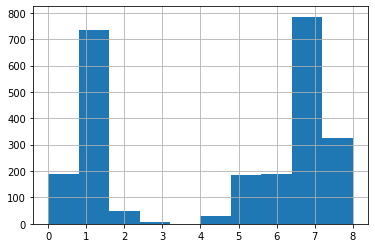

In [129]:
df.label.hist()

## Desventajas

* No captura semantica
* No tiene en cuenta posicion relativa en el texto

In [ ]:
no me gusta el vino            Neg
me gusta el vino pero no tomo  Pos